In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,BatchNormalization,Dropout
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator,img_to_array
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# At first i import the needed libraries for the model

In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define constants

In [4]:

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 50
NUM_CLASSES = 4  # Number of classes (handmade, fashion, cosmetics,accssespries)

# Path to your dataset directory

In [7]:
data_dir = r'D:\Slash_AI'

In [17]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1-Get list of all image files
# 2-Extract class labels from file paths
# 3-Map class labels to integers
# 4-Convert labels to integers

In [20]:
# Get list of all image files
image_files = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            image_files.append(os.path.join(root, file))

# Extract class labels from file paths
labels = [os.path.basename(os.path.dirname(file)) for file in image_files]

# Map class labels to integers
label_map = {label: i for i, label in enumerate(np.unique(labels))}
num_classes = len(label_map)

# Convert labels to integers
labels = [label_map[label] for label in labels]

# 1-Create DataFrame with file paths and labels
# 2-Convert label column to string
# 3-Split data into training and validation sets

In [21]:
# Create DataFrame with file paths and labels
data = pd.DataFrame({'filename': image_files, 'label': labels})

# Convert label column to string
data['label'] = data['label'].astype(str)

# Split data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Create data generators for training and validation

In [22]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_dataframe(
    train_data,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_data,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 169 validated image filenames belonging to 4 classes.
Found 43 validated image filenames belonging to 4 classes.


In [26]:
assert len(train_generator.class_indices) == num_classes
assert len(val_generator.class_indices) == num_classes
print(f"Found {train_generator.samples} train image filenames belonging to {num_classes} classes.")
print(f"Found {val_generator.samples} validated image filenames belonging to {num_classes} classes.")

Found 169 train image filenames belonging to 4 classes.
Found 43 validated image filenames belonging to 4 classes.


# make some visualization to our data and their Labels

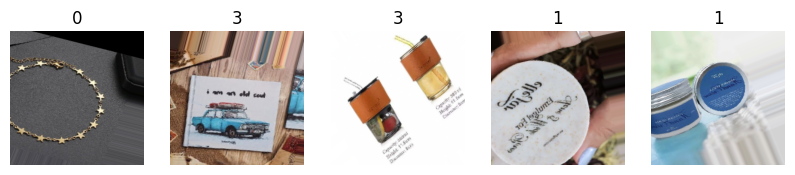

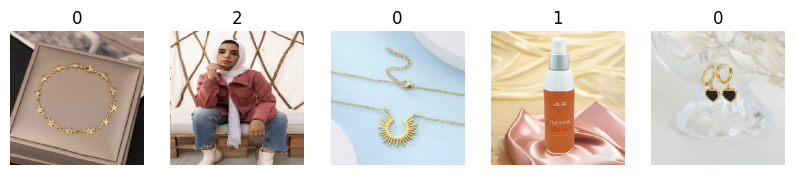

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Define a function to plot images with labels
def plot_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        class_index = np.argmax(labels[i])  # Get the class index
        class_name = class_names[str(class_index)]  # Get the class name using the index
        plt.title(class_name)
        plt.axis("off")
    plt.show()

# Load a batch of training data
train_data_batch, train_labels_batch = next(iter(train_generator))

# Load a batch of test data
test_data_batch, test_labels_batch = next(iter(val_generator))

# Plot some training images with labels
plot_images(train_data_batch, train_labels_batch, train_generator.class_indices, num_images=5)

# Plot some test images with labels
plot_images(test_data_batch, test_labels_batch, val_generator.class_indices, num_images=5)


# Define the model architecture

In [27]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# 1-Compile the model
# 2-Define early stopping to prevent overfitting
# 3-Train the model

In [29]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/50
6/6 [==============================] - 11s 2s/step - loss: 1.1509 - accuracy: 0.6095 - val_loss: 1.1201 - val_accuracy: 0.5116
Epoch 2/50
6/6 [==============================] - 9s 2s/step - loss: 0.9547 - accuracy: 0.5976 - val_loss: 0.9317 - val_accuracy: 0.5814
Epoch 3/50
6/6 [==============================] - 9s 1s/step - loss: 0.9326 - accuracy: 0.5266 - val_loss: 1.0231 - val_accuracy: 0.4884
Epoch 4/50
6/6 [==============================] - 9s 1s/step - loss: 0.8078 - accuracy: 0.7219 - val_loss: 0.8621 - val_accuracy: 0.6279
Epoch 5/50
6/6 [==============================] - 9s 1s/step - loss: 0.7440 - accuracy: 0.7396 - val_loss: 0.8581 - val_accuracy: 0.7442
Epoch 6/50
6/6 [==============================] - 9s 1s/step - loss: 0.8915 - accuracy: 0.7101 - val_loss: 0.9090 - val_accuracy: 0.6512
Epoch 7/50
6/6 [==============================] - 9s 1s/step - loss: 0.7917 - accuracy: 0.7101 - val_loss: 0.9883 - val_accuracy: 0.5814
Epoch 8/50
6/6 [========================

# Evaluate the model

In [30]:

loss, accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')

2/2 [==============================] - 1s 115ms/step - loss: 0.6498 - accuracy: 0.7907
Validation Loss: 0.6498, Validation Accuracy: 0.7907


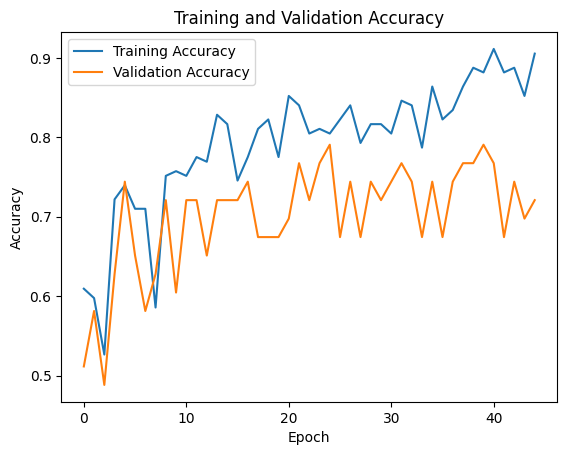

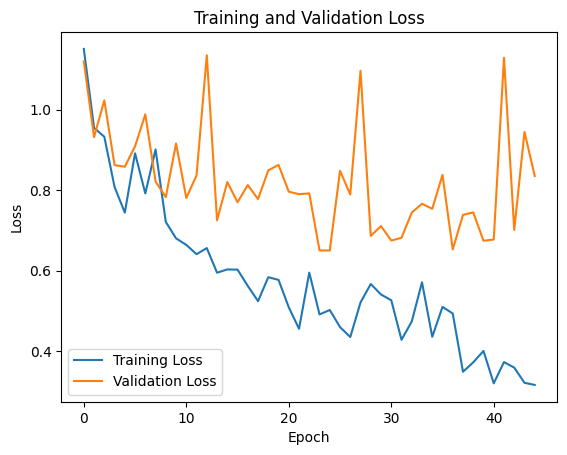

2/2 [==============================] - 1s 172ms/step - loss: 0.6498 - accuracy: 0.7907
Test Loss: 0.6498, Test Accuracy: 0.7907


In [32]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(val_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


# in this arch model i add regularization to prevent overfitting

In [33]:
from tensorflow.keras import regularizers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

In [34]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/50
6/6 [==============================] - 11s 2s/step - loss: 6.4878 - accuracy: 0.3018 - val_loss: 2.3007 - val_accuracy: 0.4884
Epoch 2/50
6/6 [==============================] - 9s 1s/step - loss: 2.2860 - accuracy: 0.4852 - val_loss: 2.0774 - val_accuracy: 0.5116
Epoch 3/50
6/6 [==============================] - 9s 2s/step - loss: 2.2007 - accuracy: 0.5858 - val_loss: 1.7829 - val_accuracy: 0.6744
Epoch 4/50
6/6 [==============================] - 9s 1s/step - loss: 1.9079 - accuracy: 0.6509 - val_loss: 1.7274 - val_accuracy: 0.6279
Epoch 5/50
6/6 [==============================] - 9s 1s/step - loss: 1.8054 - accuracy: 0.6450 - val_loss: 1.5309 - val_accuracy: 0.6977
Epoch 6/50
6/6 [==============================] - 9s 1s/step - loss: 1.6254 - accuracy: 0.7160 - val_loss: 1.4595 - val_accuracy: 0.7442
Epoch 7/50
6/6 [==============================] - 9s 1s/step - loss: 1.5599 - accuracy: 0.7101 - val_loss: 1.4580 - val_accuracy: 0.7442
Epoch 8/50
6/6 [========================

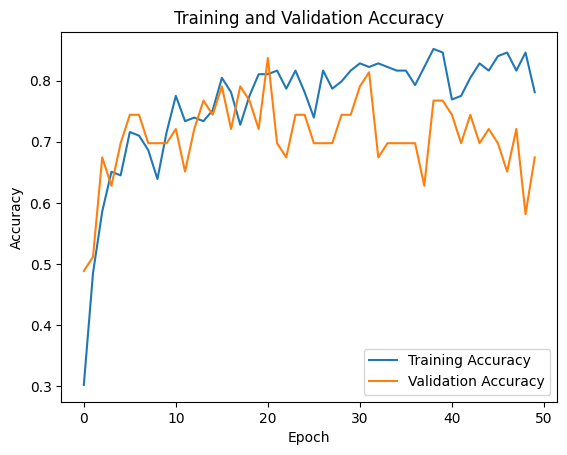

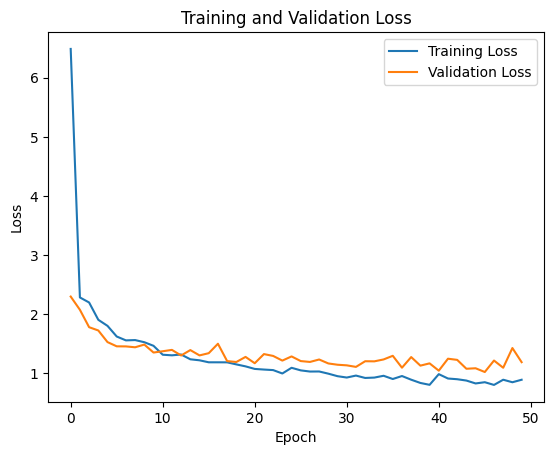

2/2 [==============================] - 1s 139ms/step - loss: 1.1916 - accuracy: 0.6744
Test Loss: 1.1916, Test Accuracy: 0.6744


In [35]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(val_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


# Fine-Tuning

In [37]:
from tensorflow.keras.applications import (
    VGG16,
    ResNet50,
    InceptionV3,
    DenseNet121
)


# Define and compile VGG16 model

In [38]:

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
vgg_model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])
vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 442s 8us/step


# Define and compile ResNet50 model

In [39]:
# Define and compile ResNet50 model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
resnet_model = Sequential([
    resnet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])
resnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define and compile InceptionV3 model

In [41]:
# Define and compile InceptionV3 model
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
inception_model = Sequential([
    inception_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])
inception_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

87910968/87910968 [==============================] - 357s 4us/step


# Define and compile DenseNet121 model

In [42]:
# Define and compile DenseNet121 model
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
densenet_model = Sequential([
    densenet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])
densenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

29084464/29084464 [==============================] - 251s 9us/step


# Train VGG16 model

In [43]:

vgg_history = vgg_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Epoch 1/50
6/6 [==============================] - 68s 12s/step - loss: 11.4429 - accuracy: 0.3550 - val_loss: 1.3954 - val_accuracy: 0.1628
Epoch 2/50
6/6 [==============================] - 65s 11s/step - loss: 1.3527 - accuracy: 0.2722 - val_loss: 6.5504 - val_accuracy: 0.4884
Epoch 3/50
6/6 [==============================] - 65s 11s/step - loss: 2.6073 - accuracy: 0.3254 - val_loss: 2.2297 - val_accuracy: 0.1860
Epoch 4/50
6/6 [==============================] - 64s 12s/step - loss: 1.4068 - accuracy: 0.3195 - val_loss: 1.2822 - val_accuracy: 0.1860
Epoch 5/50
6/6 [==============================] - 65s 11s/step - loss: 1.2432 - accuracy: 0.3787 - val_loss: 1.1706 - val_accuracy: 0.4884
Epoch 6/50
6/6 [==============================] - 65s 11s/step - loss: 1.2366 - accuracy: 0.3787 - val_loss: 1.1093 - val_accuracy: 0.4884
Epoch 7/50
6/6 [==============================] - 65s 11s/step - loss: 1.1779 - accuracy: 0.4734 - val_loss: 1.1502 - val_accuracy: 0.4884
Epoch 8/50
6/6 [==========

# Train ResNet50 model

In [44]:

resnet_history = resnet_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Epoch 1/50
6/6 [==============================] - 52s 7s/step - loss: 54.8332 - accuracy: 0.4201 - val_loss: 1747.8593 - val_accuracy: 0.4884
Epoch 2/50
6/6 [==============================] - 38s 6s/step - loss: 2.7349 - accuracy: 0.6627 - val_loss: 18588.2617 - val_accuracy: 0.4884
Epoch 3/50
6/6 [==============================] - 38s 7s/step - loss: 0.8835 - accuracy: 0.7811 - val_loss: 1754.0458 - val_accuracy: 0.4884
Epoch 4/50
6/6 [==============================] - 38s 6s/step - loss: 1.0335 - accuracy: 0.7574 - val_loss: 34.7674 - val_accuracy: 0.4884
Epoch 5/50
6/6 [==============================] - 38s 7s/step - loss: 0.7772 - accuracy: 0.7870 - val_loss: 7499.4185 - val_accuracy: 0.1860
Epoch 6/50
6/6 [==============================] - 38s 6s/step - loss: 0.5813 - accuracy: 0.7988 - val_loss: 3444.2061 - val_accuracy: 0.1860
Epoch 7/50
6/6 [==============================] - 39s 6s/step - loss: 0.6451 - accuracy: 0.7929 - val_loss: 207730.4688 - val_accuracy: 0.1860
Epoch 8/50


# Train InceptionV3 model

In [46]:

inception_history = inception_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Epoch 1/50
6/6 [==============================] - 40s 4s/step - loss: 25.8785 - accuracy: 0.3550 - val_loss: 1242.7111 - val_accuracy: 0.4884
Epoch 2/50
6/6 [==============================] - 25s 4s/step - loss: 4.1642 - accuracy: 0.3964 - val_loss: 3908.4912 - val_accuracy: 0.4884
Epoch 3/50
6/6 [==============================] - 25s 4s/step - loss: 15.3068 - accuracy: 0.4142 - val_loss: 61188.5234 - val_accuracy: 0.4884
Epoch 4/50
6/6 [==============================] - 24s 4s/step - loss: 1.4897 - accuracy: 0.3728 - val_loss: 8631901.0000 - val_accuracy: 0.3488
Epoch 5/50
6/6 [==============================] - 25s 4s/step - loss: 1.4226 - accuracy: 0.4201 - val_loss: 24530912.0000 - val_accuracy: 0.3023
Epoch 6/50
6/6 [==============================] - 25s 5s/step - loss: 20.7576 - accuracy: 0.3669 - val_loss: 89918776.0000 - val_accuracy: 0.4884


# Train DenseNet121 model

In [47]:

densenet_history = densenet_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Epoch 1/50
6/6 [==============================] - 87s 10s/step - loss: 24.4145 - accuracy: 0.4615 - val_loss: 4.1025 - val_accuracy: 0.5814
Epoch 2/50
6/6 [==============================] - 54s 9s/step - loss: 2.3470 - accuracy: 0.8284 - val_loss: 13.1781 - val_accuracy: 0.3721
Epoch 3/50
6/6 [==============================] - 53s 9s/step - loss: 1.1552 - accuracy: 0.7988 - val_loss: 31.0101 - val_accuracy: 0.5349
Epoch 4/50
6/6 [==============================] - 53s 9s/step - loss: 0.6214 - accuracy: 0.8343 - val_loss: 42.7454 - val_accuracy: 0.5814
Epoch 5/50
6/6 [==============================] - 53s 9s/step - loss: 0.3338 - accuracy: 0.8817 - val_loss: 27.1996 - val_accuracy: 0.6279
Epoch 6/50
6/6 [==============================] - 54s 9s/step - loss: 1.2347 - accuracy: 0.7278 - val_loss: 7.8081 - val_accuracy: 0.6047


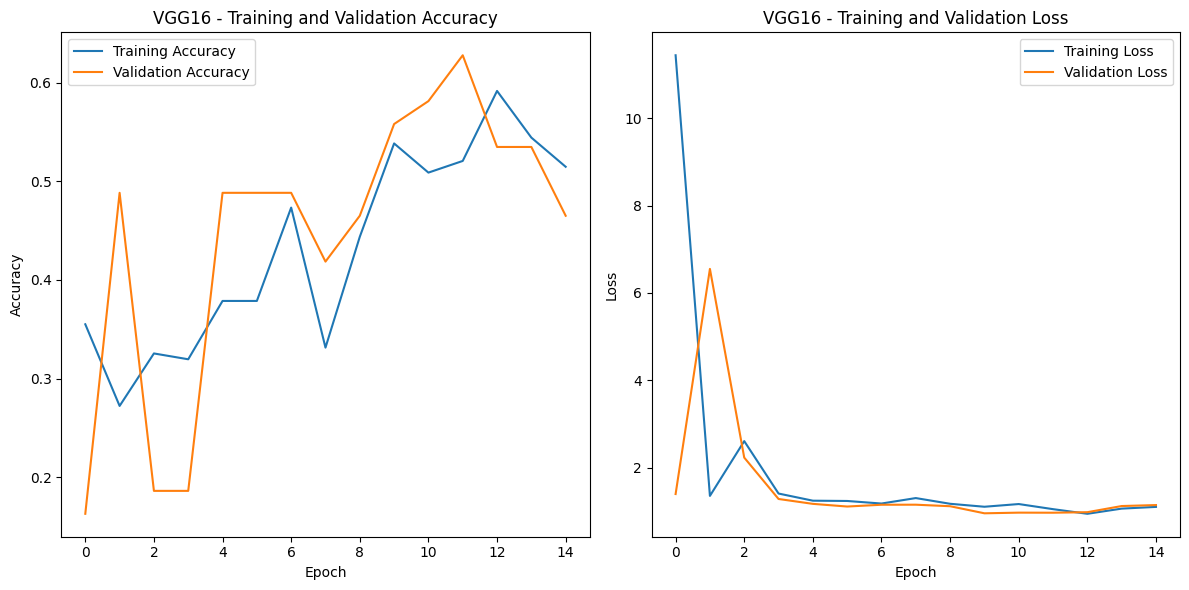

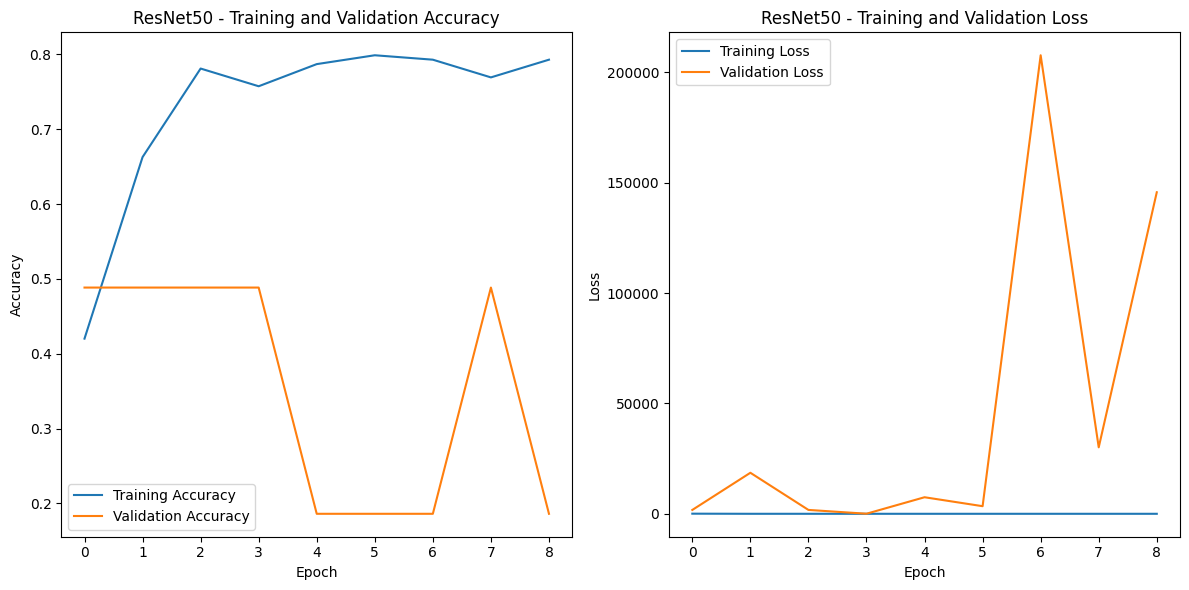

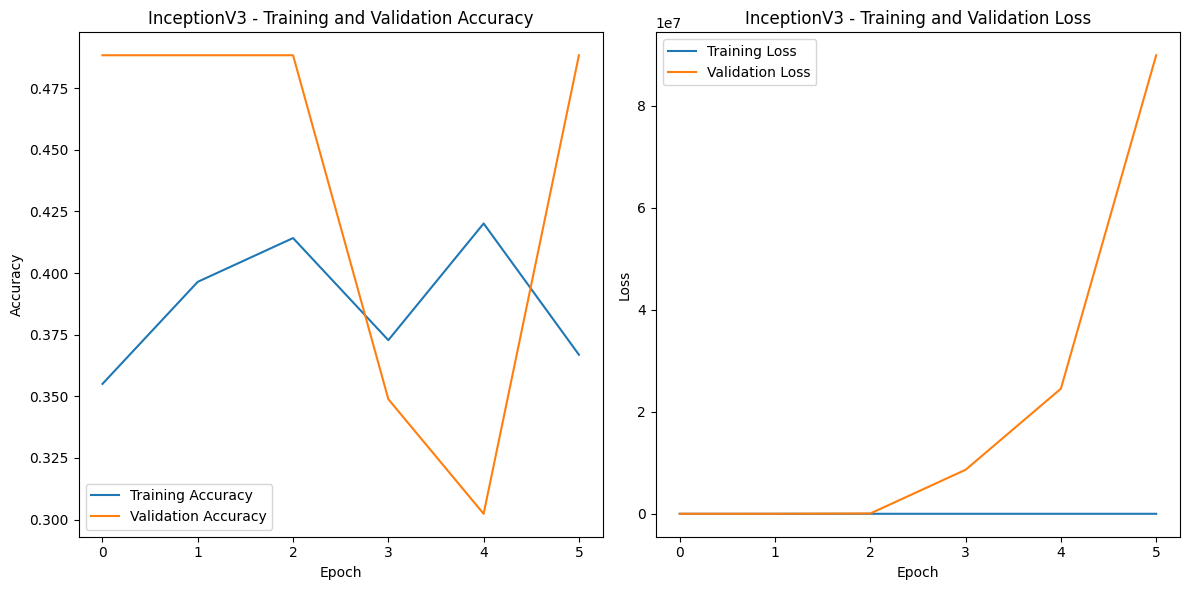

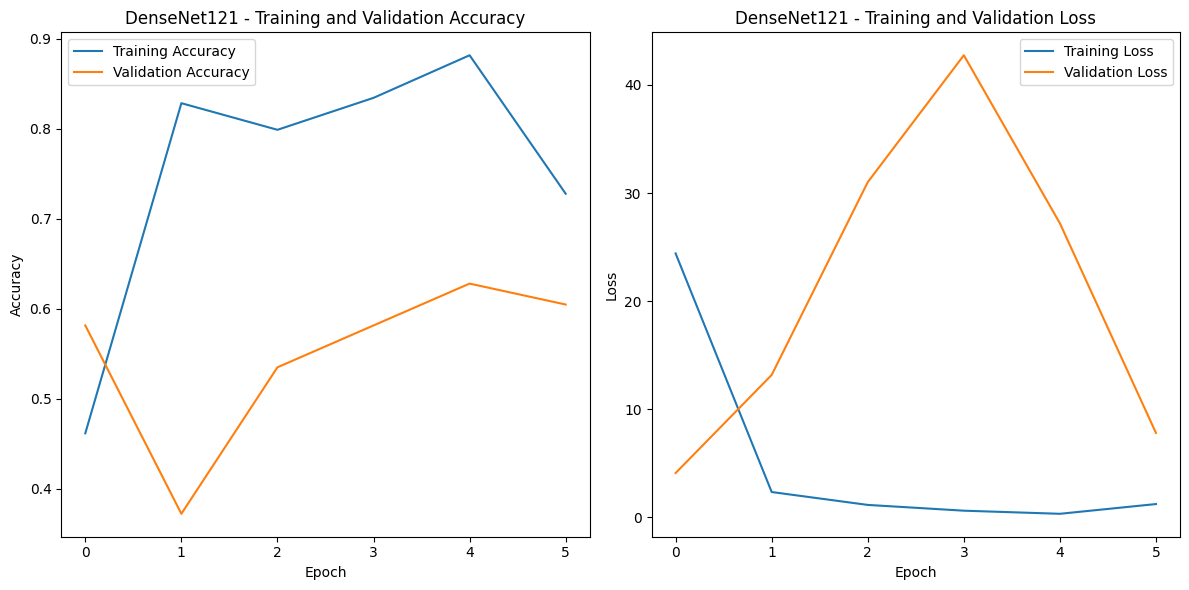

In [48]:
import matplotlib.pyplot as plt

# Define a function to plot training and validation metrics
def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 6))
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot metrics for each model
plot_metrics(vgg_history, "VGG16")
plot_metrics(resnet_history, "ResNet50")
plot_metrics(inception_history, "InceptionV3")
plot_metrics(densenet_history, "DenseNet121")


In [49]:
# Load pre-trained ResNet50 model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = ResNet50(weights='imagenet', include_top=False)
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)


In [51]:
# Create final model
model = Model(inputs=base_model.input, outputs=x)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
# Define callbacks
callbacks = [
    EarlyStopping(patience=5, monitor='val_loss'),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]

In [54]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=15,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=callbacks
)

Epoch 1/15
5/5 [==============================] - ETA: 0s - loss: 1.6291 - accuracy: 0.2993

c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 16s 3s/step - loss: 1.6291 - accuracy: 0.2993 - val_loss: 1.2330 - val_accuracy: 0.5312
Epoch 2/15
5/5 [==============================] - 10s 2s/step - loss: 1.2974 - accuracy: 0.3431 - val_loss: 1.0195 - val_accuracy: 0.4375
Epoch 3/15
5/5 [==============================] - 9s 2s/step - loss: 1.1639 - accuracy: 0.4161 - val_loss: 1.0397 - val_accuracy: 0.5625
Epoch 4/15
5/5 [==============================] - 10s 2s/step - loss: 1.0983 - accuracy: 0.5109 - val_loss: 1.1232 - val_accuracy: 0.5000
Epoch 5/15
5/5 [==============================] - 10s 2s/step - loss: 1.0320 - accuracy: 0.4453 - val_loss: 1.0083 - val_accuracy: 0.5312
Epoch 6/15
5/5 [==============================] - 11s 2s/step - loss: 1.0444 - accuracy: 0.5688 - val_loss: 1.0745 - val_accuracy: 0.4688
Epoch 7/15
5/5 [==============================] - 10s 2s/step - loss: 0.9545 - accuracy: 0.6058 - val_loss: 0.9797 - val_accuracy: 0.4375
Epoch 8/15
5/5 [==============================

In [55]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(val_generator, steps=val_generator.samples // BATCH_SIZE)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

1/1 [==============================] - 2s 2s/step - loss: 1.0375 - accuracy: 0.5312
Test Loss: 1.0374692678451538
Test Accuracy: 0.53125


# As i found the DenseNet121 will give the best accuracy for our model and dataset so i work on it 

In [57]:
# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False)

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=x)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(patience=5, monitor='val_loss'),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]

In [58]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=callbacks
)

Epoch 1/50
5/5 [==============================] - 18s 2s/step - loss: 1.1885 - accuracy: 0.5693 - val_loss: 1.1497 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 10s 2s/step - loss: 0.7881 - accuracy: 0.8029 - val_loss: 0.5900 - val_accuracy: 0.6875
Epoch 3/50
5/5 [==============================] - 10s 2s/step - loss: 0.3996 - accuracy: 0.8686 - val_loss: 0.6035 - val_accuracy: 0.6875
Epoch 4/50
5/5 [==============================] - 11s 2s/step - loss: 0.3346 - accuracy: 0.8938 - val_loss: 0.2094 - val_accuracy: 0.9375
Epoch 5/50
5/5 [==============================] - 10s 2s/step - loss: 0.1599 - accuracy: 0.9343 - val_loss: 0.1865 - val_accuracy: 0.9688
Epoch 6/50
5/5 [==============================] - 10s 2s/step - loss: 0.1496 - accuracy: 0.9489 - val_loss: 0.1475 - val_accuracy: 0.9688
Epoch 7/50
5/5 [==============================] - 10s 2s/step - loss: 0.0973 - accuracy: 0.9635 - val_loss: 0.2465 - val_accuracy: 0.9062
Epoch 8/50
5/5 [==================

In [59]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(val_generator, steps=val_generator.samples // BATCH_SIZE)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

1/1 [==============================] - 2s 2s/step - loss: 0.4681 - accuracy: 0.8125
Test Loss: 0.46806782484054565
Test Accuracy: 0.8125


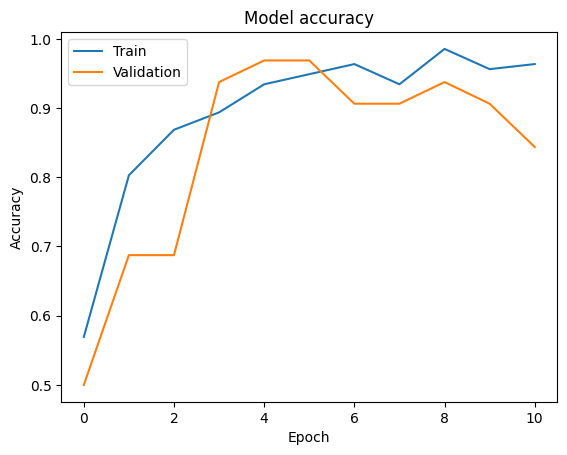

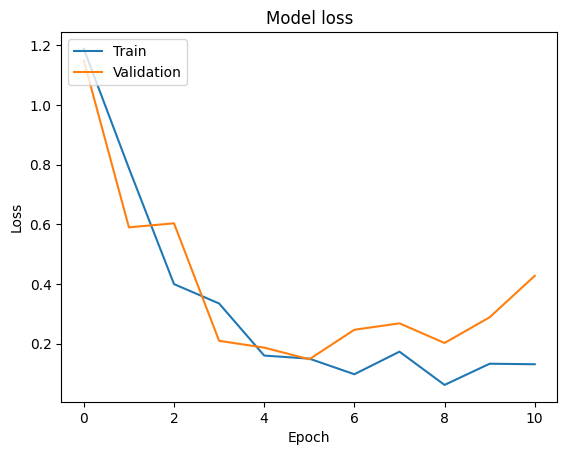

In [60]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [62]:
# Print the classes of the model
print("Classes of the model:")
print(train_generator.class_indices)


Classes of the model:
{'0': 0, '1': 1, '2': 2, '3': 3}


# plotting some sampels outside the datasets(Testing)

In [69]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model = tf.keras.models.load_model('best_model.h5')

# Load sample images
image_files = [r'C:\Users\Mohamed Elzoka\Pictures\Saved Pictures\WhatsApp Image 2022-02-21 at 9.47.49 PM.jpeg', r'D:\Slash_AI\accessories\IMG_E0652.JPG',r'C:\Users\Mohamed Elzoka\Pictures\Saved Pictures\WhatsApp Image 2022-03-01 at 9.51.16 PM (1).jpeg']

# Define class labels
class_labels = {0: 'accessories', 1: 'cosmatics', 2: 'fashion', 3: 'handmade'}

# Process each sample image
for img_file in image_files:
    img = image.load_img(img_file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Get the predicted class label
    predicted_label = class_labels[predicted_class]

    # Print the file name and predicted class
    print("File:", img_file)
    print("Predicted class:", predicted_label)


1/1 [==============================] - 2s 2s/step
File: C:\Users\Mohamed Elzoka\Pictures\Saved Pictures\WhatsApp Image 2022-02-21 at 9.47.49 PM.jpeg
Predicted class: fashion
1/1 [==============================] - 0s 111ms/step
File: D:\Slash_AI\accessories\IMG_E0652.JPG
Predicted class: accessories
1/1 [==============================] - 0s 115ms/step
File: C:\Users\Mohamed Elzoka\Pictures\Saved Pictures\WhatsApp Image 2022-03-01 at 9.51.16 PM (1).jpeg
Predicted class: fashion


1/1 [==============================] - 0s 109ms/step


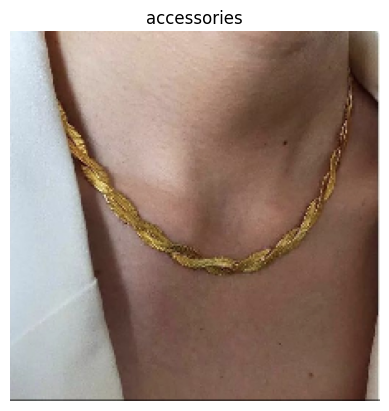

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Define a function to plot images with labels
def plot_image_with_label(image_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Get model prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Plot the image with its predicted label
    plt.imshow(img)
    plt.title(class_labels[predicted_class])
    plt.axis("off")
    plt.show()

# Example usage
image_path = r"D:\Slash_AI\accessories\IMG_E0652.JPG"  # Replace this with the path to your image
plot_image_with_label(image_path, model, class_labels)


1/1 [==============================] - 0s 107ms/step


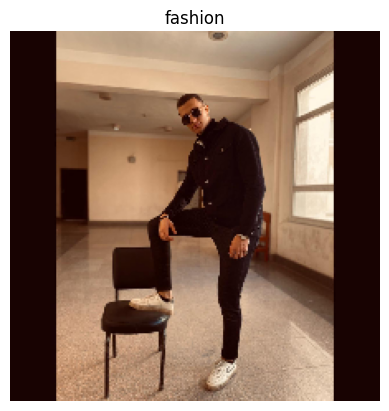

In [71]:
# Example usage(this is my image)
image_path = r"C:\Users\Mohamed Elzoka\Pictures\Saved Pictures\WhatsApp Image 2022-02-21 at 9.47.53 PM.jpeg"  # Replace this with the path to your image
plot_image_with_label(image_path, model, class_labels)

1/1 [==============================] - 0s 106ms/step


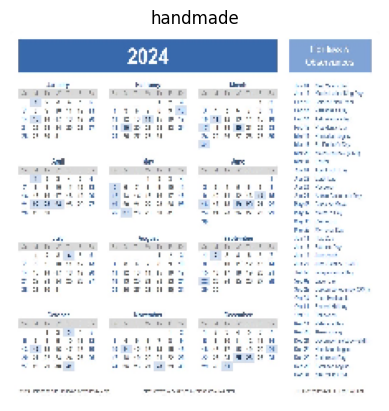

In [72]:
# Example usage
image_path = r"C:\Users\Mohamed Elzoka\Downloads\WhatsApp Image 2024-03-20 at 23.41.38_6e32630a.jpg"  # Replace this with the path to your image
plot_image_with_label(image_path, model, class_labels)

# brief
I took screenshots from images displayed on the Slash app, then adjusted and filtered them. I performed classification and preprocessing, along with data augmentation. I  wanted to use GANs to generate more images to augment my  dataset, but due to time constraints and limited computing resources (working on a CPU), I opted for building an architecture for a CNN model. I focused on avoiding overfitting by employing various techniques outlined in your code. After fine-tuning, i achieved the best model for your data, even utilizing samples from outside your dataset. Finally, your model successfully performed image classification. And I could make the model give more high accuracy if i take more photos from the app and apply on GANS

# Thanks